In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('../graph_data/group_gcc_lang.csv')
language = df.rename(columns={"rows/key/0": "Greater Capital City", "rows/key/1": "language", "rows/value": "Count"})
language


,Greater Capital City,language,Count
0,Australian Capital Territory (Canberra),ar,143
1,Australian Capital Territory (Canberra),art,76
2,Australian Capital Territory (Canberra),bg,3
3,Australian Capital Territory (Canberra),bn,2
4,Australian Capital Territory (Canberra),ca,123
...,...,...,...
436,Greater Sydney,vi,101
437,Greater Sydney,zh,11538
438,Greater Sydney,zxx,3564
439,Other Territory,en,40


In [42]:
grouped = language.groupby(['Greater Capital City', 'language'])['Count'].sum()

grouped_pct = grouped.groupby(level=0).apply(lambda x: x / x.sum() * 100)

language_pct = grouped_pct.reset_index(name='Percentage %').sort_values(by=['Greater Capital City','Percentage %'], ascending=False)
# Top 3 gcc
Sydney = language_pct.loc[language_pct['Greater Capital City']=='Greater Sydney']
Melbourne = language_pct.loc[language_pct['Greater Capital City']=='Greater Melbourne']
Brisbane = language_pct.loc[language_pct['Greater Capital City']=='Greater Brisbane']

In [43]:
Sydney

,Greater Capital City,language,Percentage %
387,Greater Sydney,en,73.466615
434,Greater Sydney,und,10.174397
376,Greater Sydney,ar,1.921277
403,Greater Sydney,ja,1.708290
388,Greater Sydney,es,1.597405
...,...,...,...
418,Greater Sydney,qct,0.000549
415,Greater Sydney,ps,0.000412
381,Greater Sydney,ckb,0.000274
408,Greater Sydney,ml,0.000274


In [44]:
# 获取前三个语言
top_3_languages_sydney = Sydney['language'].head(3).tolist()

# 将其他语言更改为"other"
Sydney.loc[~Sydney['language'].isin(top_3_languages_sydney), 'language'] = 'other'


# 打印结果
Sydney


,Greater Capital City,language,Percentage %
387,Greater Sydney,en,73.466615
434,Greater Sydney,und,10.174397
376,Greater Sydney,ar,1.921277
403,Greater Sydney,other,1.708290
388,Greater Sydney,other,1.597405
...,...,...,...
418,Greater Sydney,other,0.000549
415,Greater Sydney,other,0.000412
381,Greater Sydney,other,0.000274
408,Greater Sydney,other,0.000274


In [45]:
# 获取前三个语言
top_3_languages_melbourne = Melbourne['language'].head(3).tolist()

# 将其他语言更改为"other"
Melbourne.loc[~Melbourne['language'].isin(top_3_languages_melbourne), 'language'] = 'other'


# 打印结果
Melbourne

,Greater Capital City,language,Percentage %
263,Greater Melbourne,en,78.892445
310,Greater Melbourne,und,8.659566
278,Greater Melbourne,ja,1.996766
264,Greater Melbourne,other,1.458136
274,Greater Melbourne,other,1.040824
...,...,...,...
270,Greater Melbourne,other,0.000409
285,Greater Melbourne,other,0.000409
255,Greater Melbourne,other,0.000273
284,Greater Melbourne,other,0.000273


In [46]:
# 获取前三个语言
top_3_languages_brisbane= Brisbane['language'].head(3).tolist()

# 将其他语言更改为"other"
Brisbane.loc[~Brisbane['language'].isin(top_3_languages_brisbane), 'language'] = 'other'


# 打印结果
Brisbane

,Greater Capital City,language,Percentage %
119,Greater Brisbane,en,77.994892
163,Greater Brisbane,und,9.333050
135,Greater Brisbane,ja,2.724118
120,Greater Brisbane,other,1.213738
131,Greater Brisbane,other,1.165608
...,...,...,...
113,Greater Brisbane,other,0.000327
130,Greater Brisbane,other,0.000327
148,Greater Brisbane,other,0.000327
158,Greater Brisbane,other,0.000327


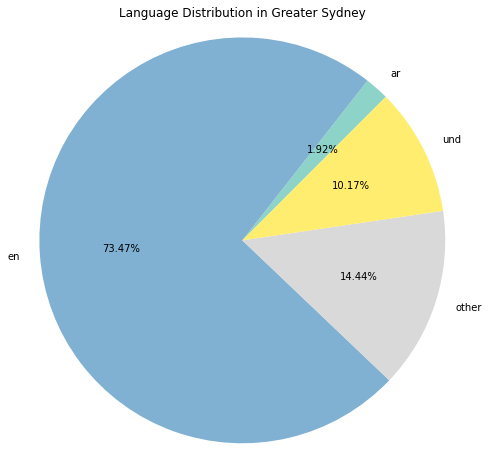

In [51]:
# Filter the dataframe to include only the desired columns
df_pie = Sydney[['language', 'Percentage %']]

# Group the dataframe by language and calculate the sum of the percentage values
df_pie = df_pie.groupby('language').sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(df_pie['language'])))
wedges, texts, autotexts = ax.pie(df_pie['Percentage %'], labels=df_pie['language'],
                                  autopct='%1.2f%%', startangle=45, colors=colors)

# Customizations
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Language Distribution in Greater Sydney')

# Display the chart
plt.show()


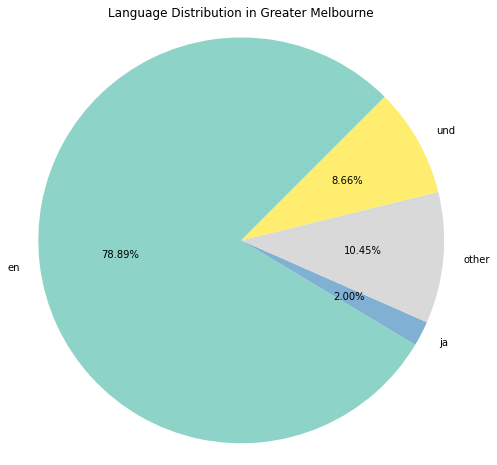

In [53]:
# Filter the dataframe to include only the desired columns
df_pie = Melbourne[['language', 'Percentage %']]

# Group the dataframe by language and calculate the sum of the percentage values
df_pie = df_pie.groupby('language').sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(df_pie['language'])))
wedges, texts, autotexts = ax.pie(df_pie['Percentage %'], labels=df_pie['language'],
                                  autopct='%1.2f%%', startangle=45, colors=colors)

# Customizations
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Language Distribution in Greater Melbourne')

# Display the chart
plt.show()

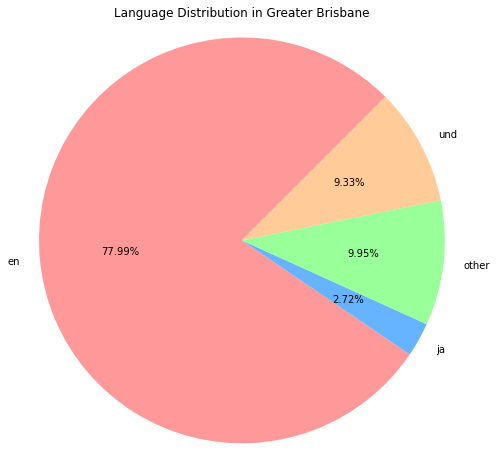

In [52]:
# Filter the dataframe to include only the desired columns
df_pie = Brisbane[['language', 'Percentage %']]

# Group the dataframe by language and calculate the sum of the percentage values
df_pie = df_pie.groupby('language').sum().reset_index()

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'] 
wedges, texts, autotexts = ax.pie(df_pie['Percentage %'], labels=df_pie['language'],
                                  autopct='%1.2f%%', startangle=45, colors=colors)

# Customizations
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Language Distribution in Greater Brisbane')

# Display the chart
plt.show()

In [62]:
# 对数据进行分组和汇总，提取前三个语言数量最多的Greater Capital City
top_cities = language.groupby('Greater Capital City').sum().sort_values(by='Count', ascending=False)

# 计算每个城市中各语言的占比
top_cities['Percent %'] = top_cities['Count'] / top_cities['Count'].sum() * 100

In [63]:
top_cities.head(3)

,Count,Percent %
Greater Capital City,,
Greater Melbourne,732785,32.498574
Greater Sydney,728682,32.316609
Greater Brisbane,305420,13.545193


### Language diversity in each gcc

### Curse words in each gcc

In [16]:
df1 = pd.read_csv('../graph_data/How many curse words per language in each gcc.csv')
curse_language= df1.rename(columns={"rows/key/0": "Greater Capital City", "rows/key/1": "Curse language", "rows/value": "Count"})
curse_language

,Greater Capital City,Curse language,Count
0,Australian Capital Territory (Canberra),de,1
1,Australian Capital Territory (Canberra),en,1112
2,Australian Capital Territory (Canberra),es,21
3,Australian Capital Territory (Canberra),in,2
4,Australian Capital Territory (Canberra),tl,2
...,...,...,...
115,Greater Sydney,th,4
116,Greater Sydney,tl,52
117,Greater Sydney,tr,1
118,Greater Sydney,und,4


In [59]:
gcc_counts = curse_language.groupby('Greater Capital City')['Count'].sum()

gcc_counts = gcc_counts.reset_index(name='Count')
gcc_counts.to_csv('How many curse language in each gcc.csv')

In [60]:
gcc_counts

,Greater Capital City,Count
0,Australian Capital Territory (Canberra),1138
1,Greater Adelaide,3943
2,Greater Brisbane,8740
3,Greater Darwin,330
4,Greater Hobart,594
5,Greater Melbourne,21002
6,Greater Perth,5016
7,Greater Sydney,18910


### Crime graph

In [48]:
drug_offence = pd.read_csv('../graph_data/illicit drug offences.csv')
offence = pd.read_csv('miscellaneous offences.csv')

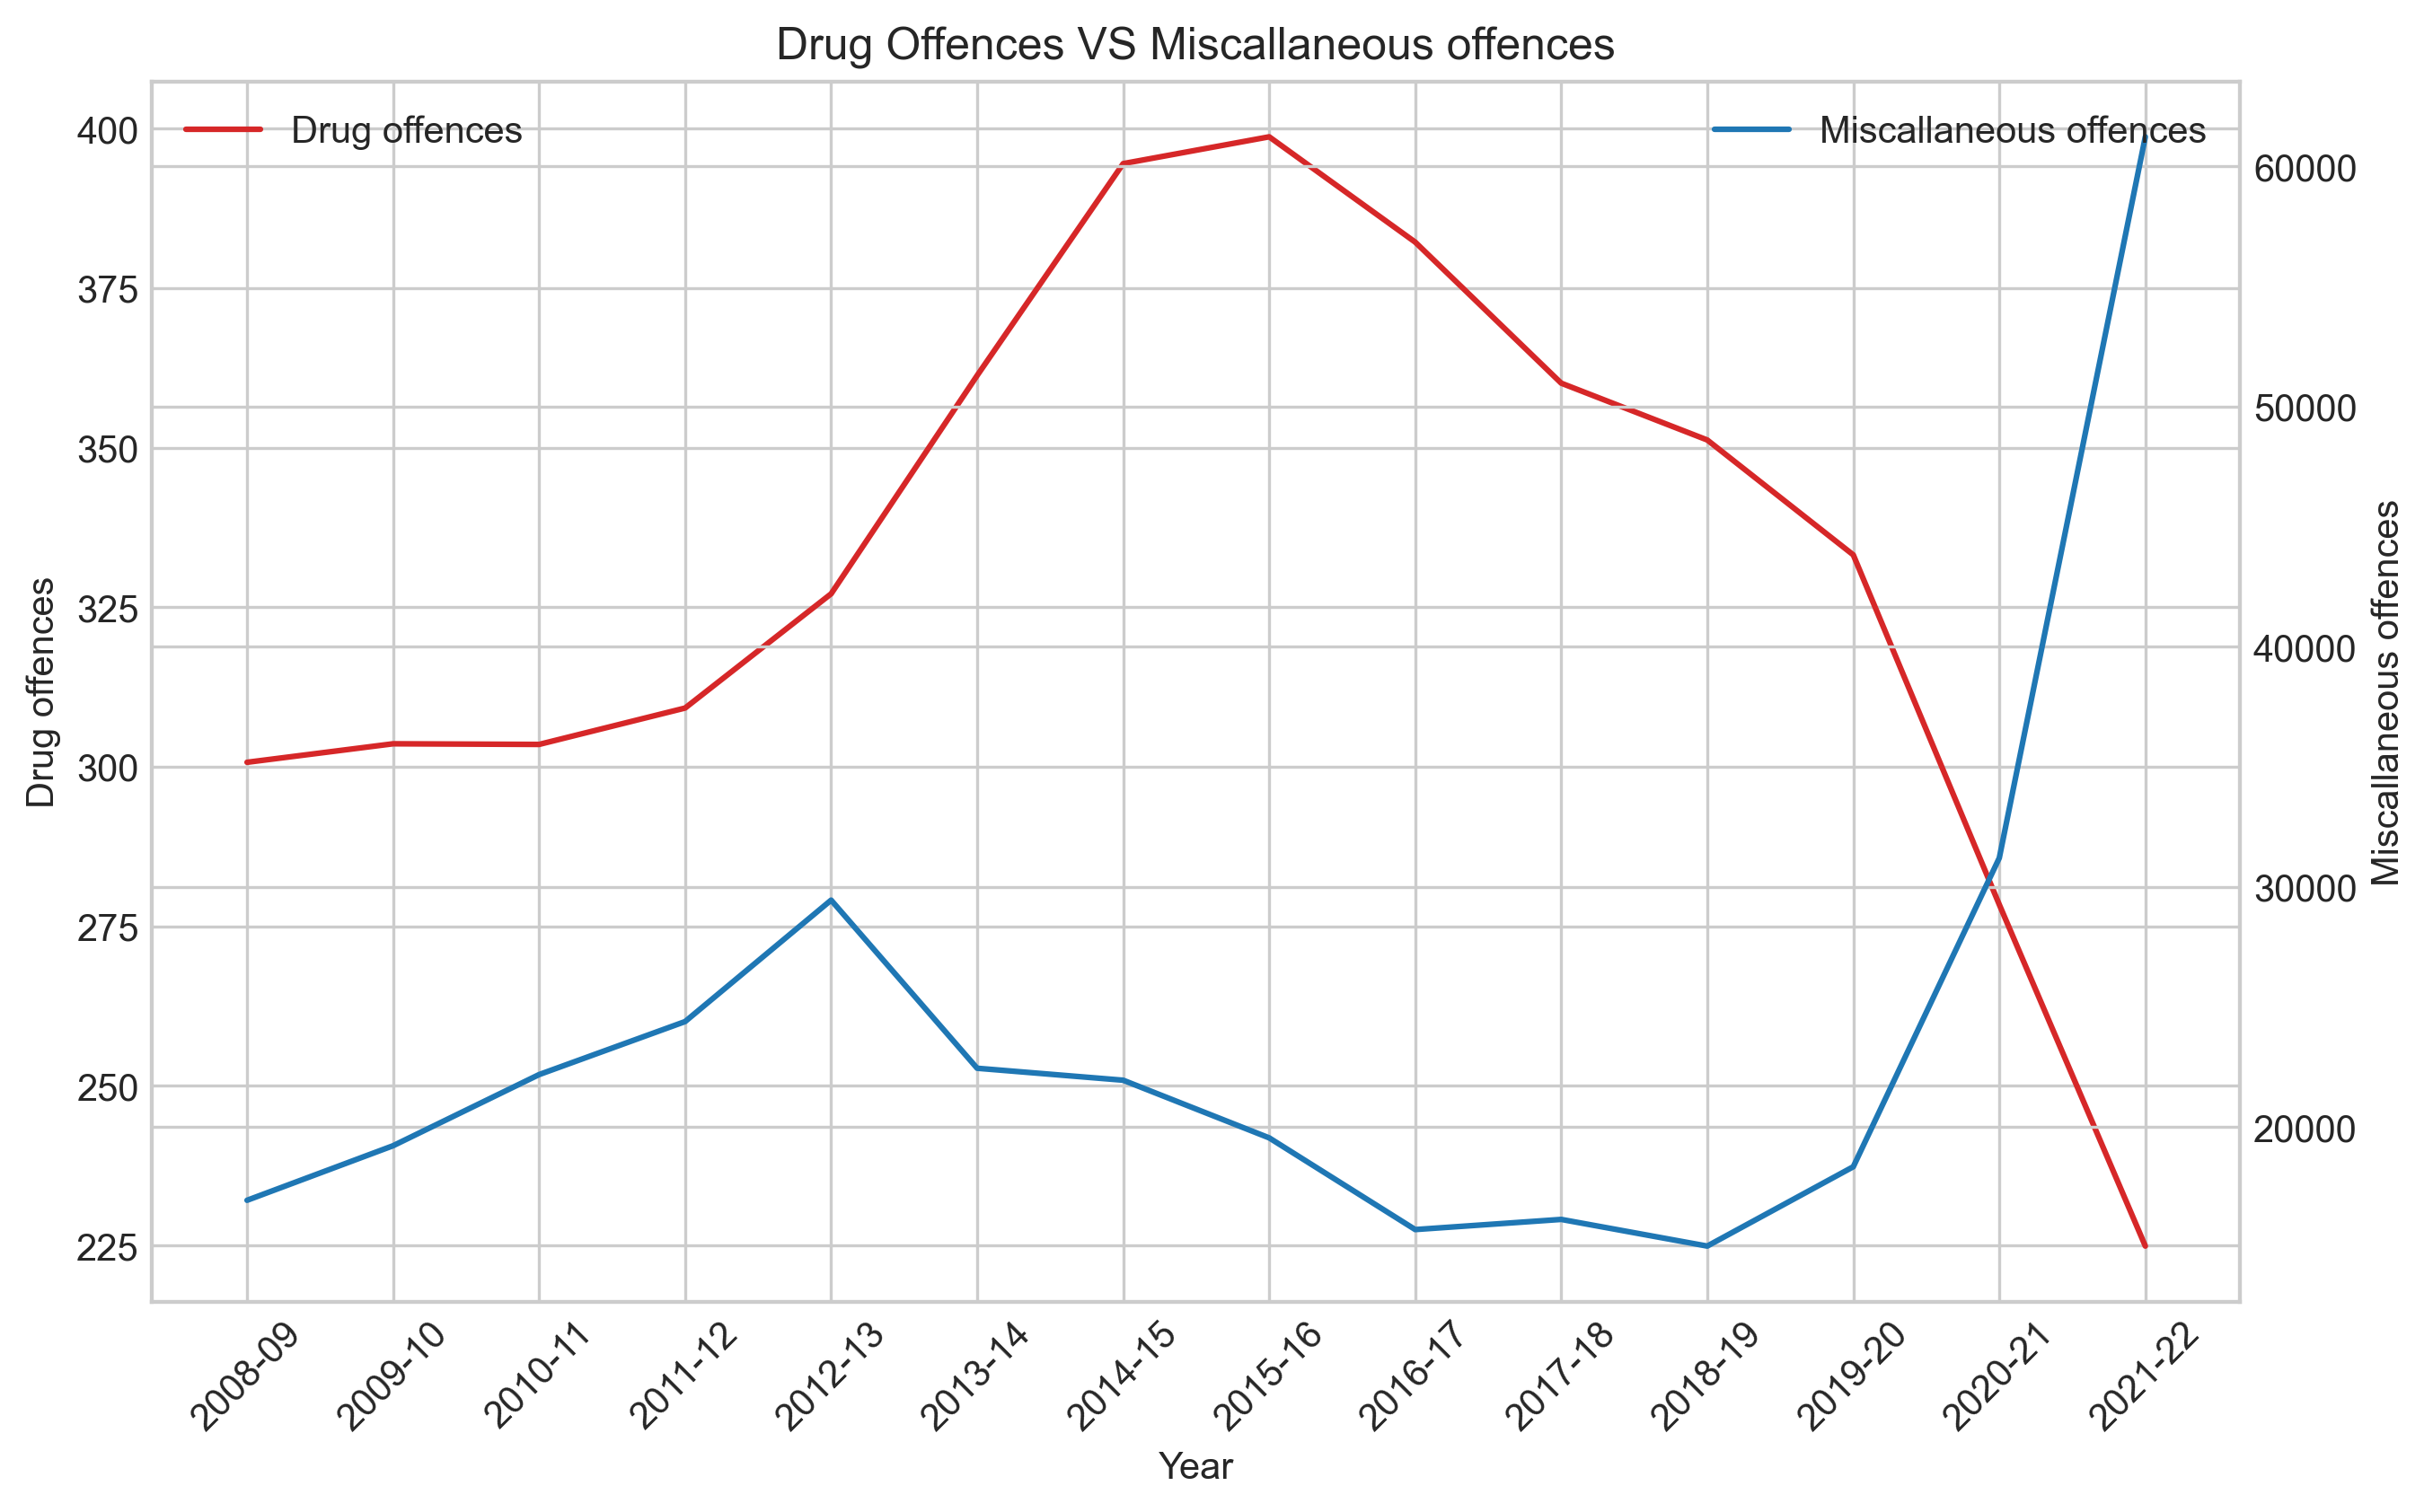

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# 创建数据框
data = {
    'Year': ['2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17',
             '2017-18', '2018-19', '2019-20', '2020-21', '2021-22'],
    'drug offences': [300.7, 303.6, 303.5, 309.2, 327.1, 361.3, 394.5, 398.7, 382.2, 360.1, 351.2, 333.2, 278.4, 224.9],
    'total': ['16,957', '19,228', '22,190', '24,397', '29,453', '22,454', '21,956', '19,556', '15,739', '16,161', 
              '15,051', '18,353', '31,209', '61,229']
}

df = pd.DataFrame(data)

# 将total列转换为数字类型
df['total'] = df['total'].str.replace(',', '').astype(int)

fig, ax1 = plt.subplots(figsize=(10, 6), dpi=300)
plt.xticks(rotation=45)

# 绘制第一条线
ax1.set_xlabel('Year')
ax1.set_ylabel('Drug offences')
ax1.plot(df['Year'], df['drug offences'], color='tab:red')

# 创建第二个纵轴
ax2 = ax1.twinx()

# 绘制第二条线
ax2.set_ylabel('Miscallaneous offences')
ax2.plot(df['Year'], df['total'], color='tab:blue')

# 添加图例
ax1.legend(labels=['Drug offences'], loc='upper left')
ax2.legend(labels=['Miscallaneous offences'], loc='upper right')

# 添加标题
plt.title('Drug Offences VS Miscallaneous offences')

plt.show()


In [2]:
percent_crime = pd.read_csv('../graph_data/percentTweetCrime.csv')
crime_count = pd.read_csv('tweetContainCrimeCountGcc.csv')


In [3]:
percent_crime

,Australian Capital Territory (Canberra),Greater Adelaide,Greater Brisbane,Greater Darwin,Greater Hobart,Greater Melbourne,Greater Perth,Greater Sydney
0,0.591616,0.473119,0.778273,0.423488,0.502525,0.597993,0.621326,0.558405


In [4]:
crime_count

,Greater Capital City,Total
0,Australian Capital Territory (Canberra),452
1,Greater Adelaide,817
2,Greater Brisbane,2677
3,Greater Darwin,92
4,Greater Hobart,216
5,Greater Melbourne,4851
6,Greater Perth,1460
7,Greater Sydney,4622


In [5]:
percent=percent_crime.melt(var_name="Greater Capital City",value_name="Percent") 
percent=percent.sort_values(by=["Greater Capital City","Percent"],ascending=False) 
percent

,Greater Capital City,Percent
7,Greater Sydney,0.558405
6,Greater Perth,0.621326
5,Greater Melbourne,0.597993
4,Greater Hobart,0.502525
3,Greater Darwin,0.423488
2,Greater Brisbane,0.778273
1,Greater Adelaide,0.473119
0,Australian Capital Territory (Canberra),0.591616


In [49]:
crime_statistics = pd.merge(percent, crime_count, on='Greater Capital City')
crime_statistics = crime_statistics[['Greater Capital City', 'Percent','Total']].sort_values(by='Percent', ascending=False)
crime_statistics

,Greater Capital City,Percent,Total
5,Greater Brisbane,0.778273,2677
1,Greater Perth,0.621326,1460
2,Greater Melbourne,0.597993,4851
7,Australian Capital Territory (Canberra),0.591616,452
0,Greater Sydney,0.558405,4622
3,Greater Hobart,0.502525,216
6,Greater Adelaide,0.473119,817
4,Greater Darwin,0.423488,92


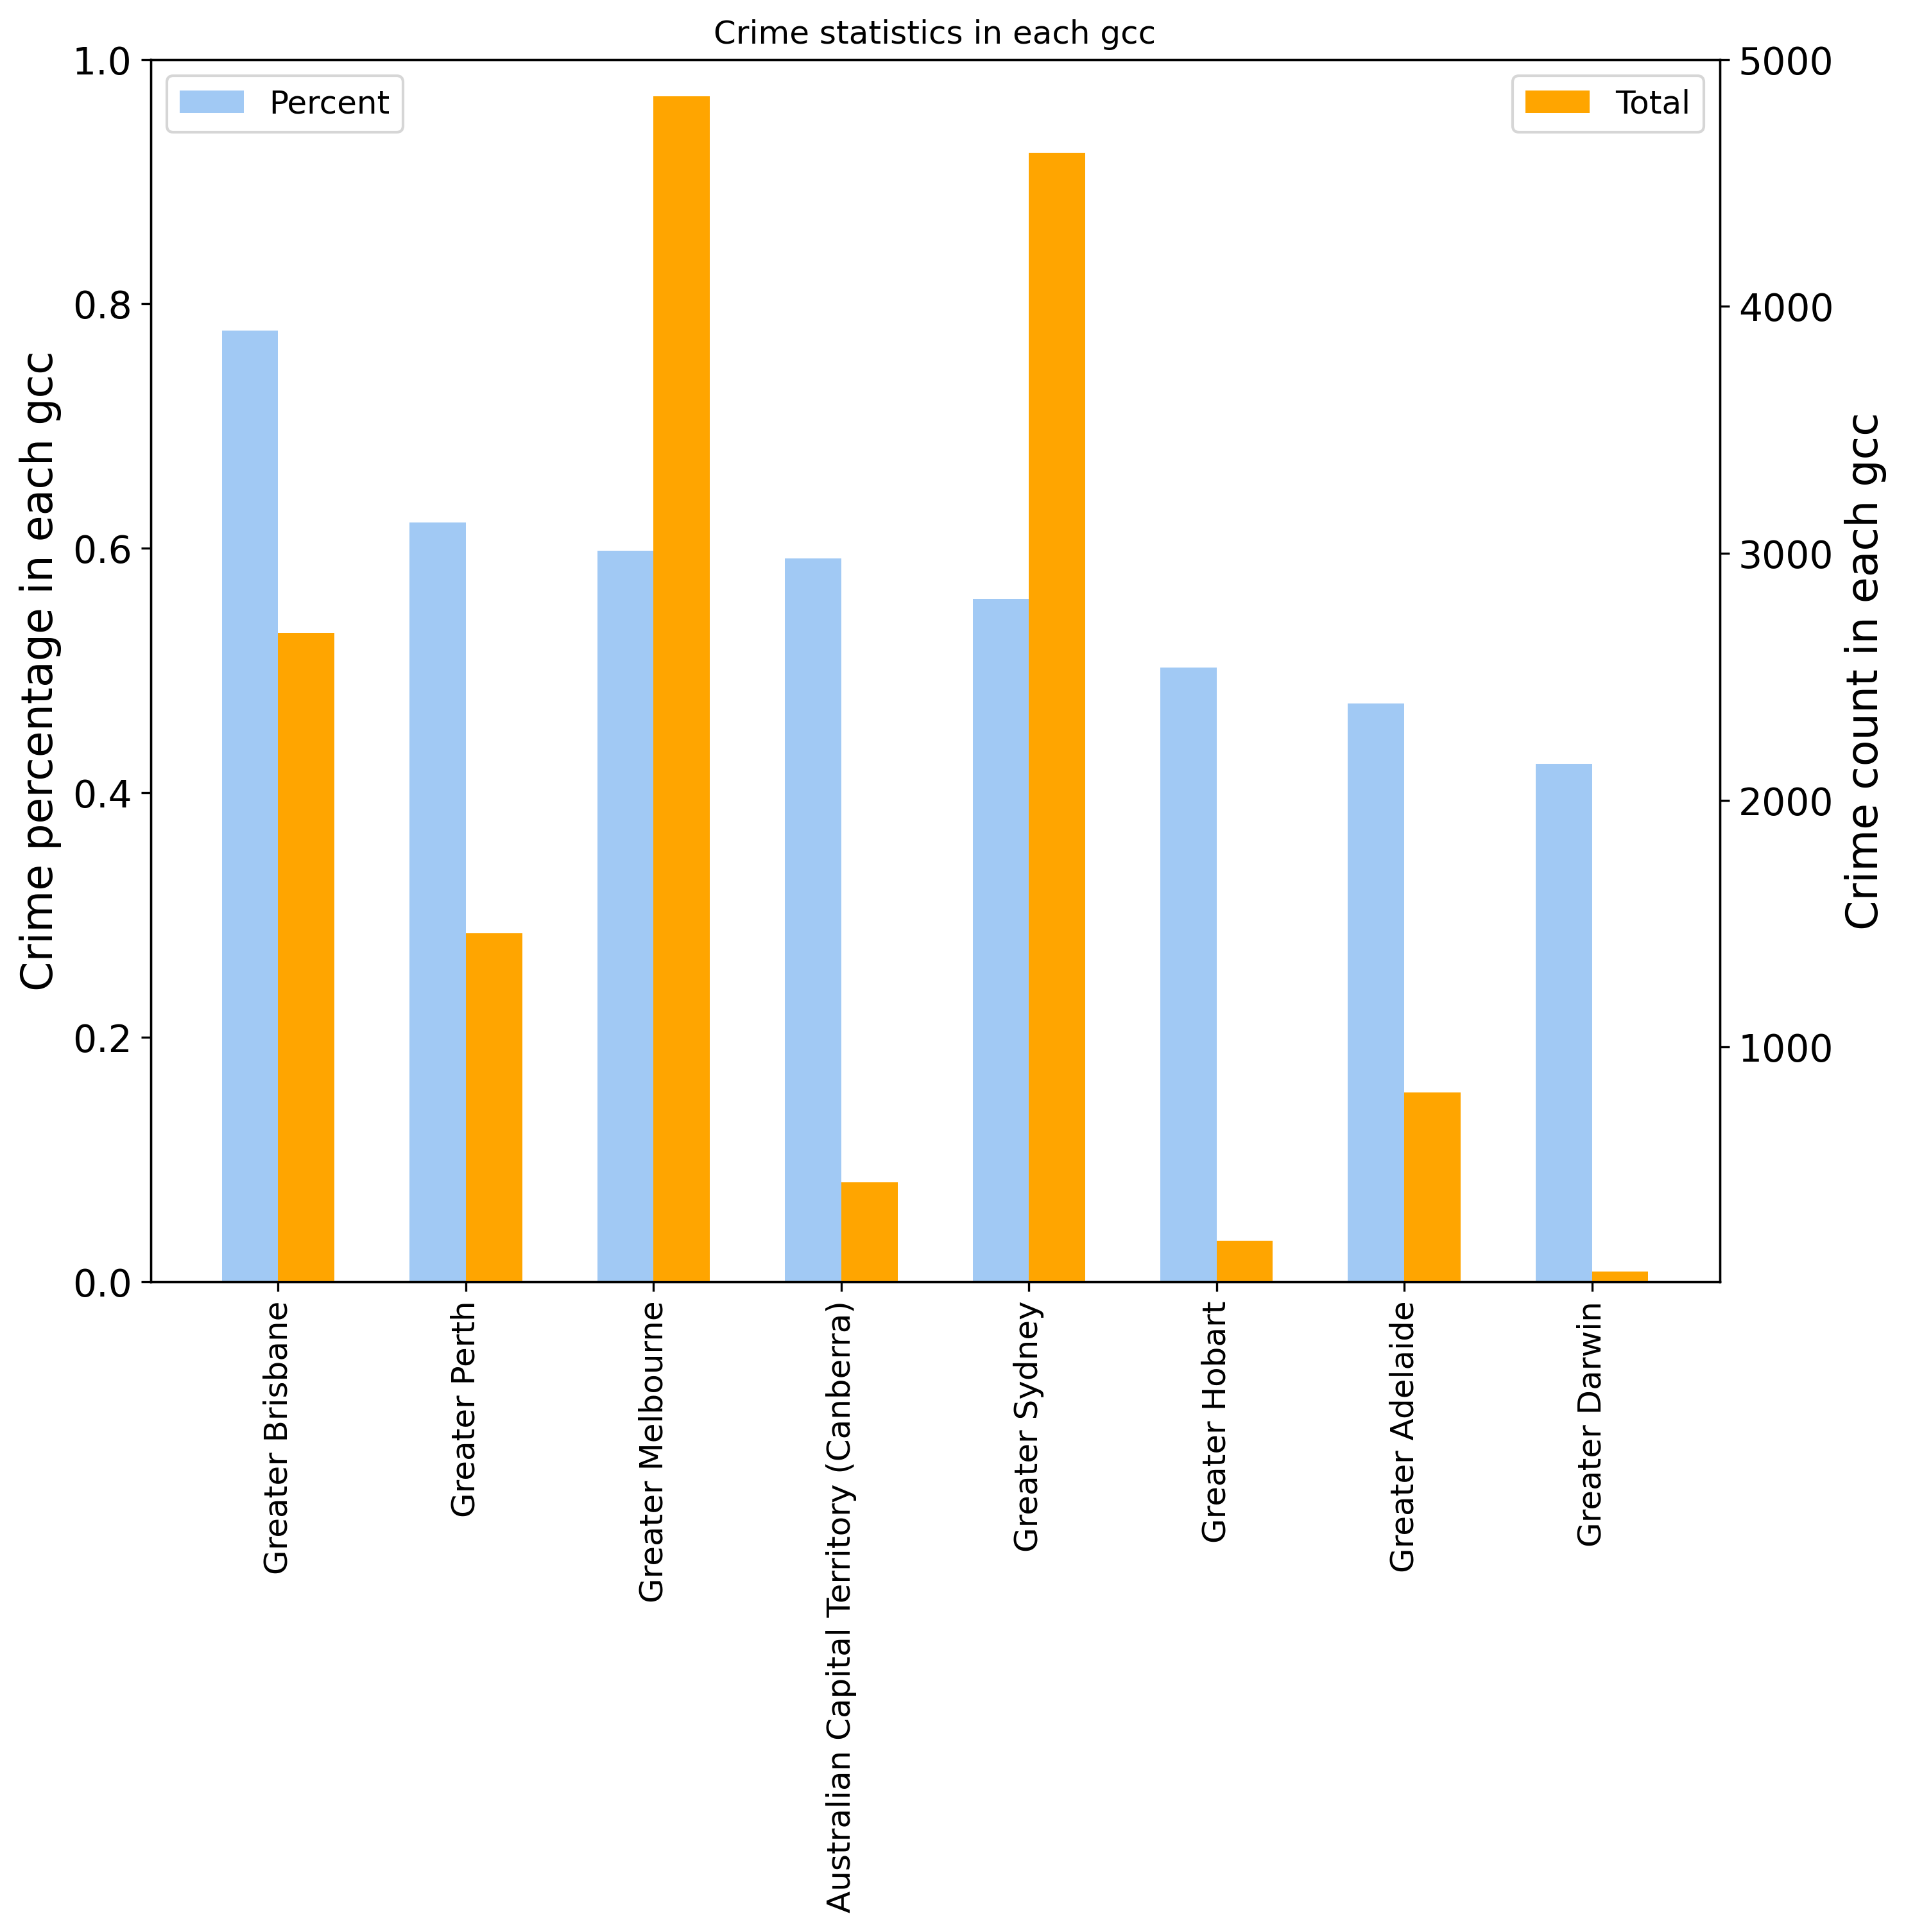

In [53]:
import seaborn as sns

# 定义颜色调色板
colors = sns.color_palette('pastel')

width = 0.3  # 柱形的宽度
x1_list = []
x2_list = []
for i in range(len(crime_statistics['Greater Capital City'])):
    x1_list.append(i)
    x2_list.append(i + width)
fig, ax1 = plt.subplots(figsize=(10, 10), dpi=300)
plt.xticks(rotation=90)

# 设置左侧Y轴对应的figure
ax1.set_ylabel('Crime percentage in each gcc')
ax1.set_ylim(0, 1)
ax1.bar(x1_list,crime_statistics['Percent'],width=width, color=colors[0], align='edge')

# 设置右侧Y轴对应的figure
ax2 = ax1.twinx()
ax2.set_ylabel('Crime count in each gcc')
ax2.set_ylim(50, 5000)
ax2.bar(x2_list,crime_statistics['Total'], width=width, color='orange', align='edge', tick_label=crime_statistics['Greater Capital City'])

ax2.legend(labels=['Total'], loc='upper right')
ax1.legend(labels=['Percent'], loc='upper left')

plt.tight_layout()
plt.title('Crime statistics in each gcc')

plt.show()


In [2]:
bot = pd.read_csv('../graph_data/Bot_detected_percentage.csv')
crime = pd.read_csv('../graph_data/Crime_in_text_detected_percentage.csv')
aus_top5 = pd.read_csv('../graph_data/aus_social_top5_languages.csv')
vulgar = pd.read_csv('../graph_data/Vulgar_in_text_detected_percentage.csv')
sensitive = pd.read_csv('../graph_data/Sensitive_detected_percentage.csv')


In [15]:
aus_top5

,Language,Count
0,en,324923
1,de,28972
2,NaN,13152
3,fr,8658
4,es,7941


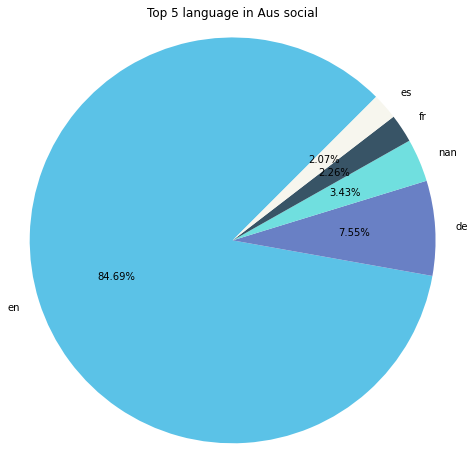

In [57]:
# Filter the dataframe to include only the desired columns
df_pie = aus_top5[['Language', 'Count']]

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#5BC2E7', '#6980C5', '#70DFDF', '#385466','#F7F6EE'] 
wedges, texts, autotexts = ax.pie(df_pie['Count'], labels=df_pie['Language'],
                                  autopct='%1.2f%%', startangle=45, colors=colors)

# Customizations
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Top 5 language in Aus social')

# Display the chart
plt.show()

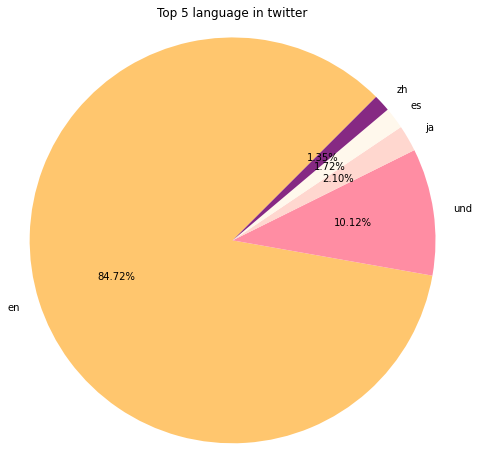

In [56]:
# Filter the dataframe to include only the desired columns
df_pie = twitter_language[['language', 'Count']]

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#FFC66E', '#FF8DA3', '#FFD7CF', '#FFF8EC', '#862983'] 
wedges, texts, autotexts = ax.pie(df_pie['Count'], labels=df_pie['language'],
                                  autopct='%1.2f%%', startangle=45, colors=colors)

# Customizations
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Top 5 language in twitter')

# Display the chart
plt.show()

In [ ]:
# Filter the dataframe to include only the desired columns
df_pie = aus_top5[['Language', 'Count']]

fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'] 
wedges, texts, autotexts = ax.pie(df_pie['Count'], labels=df_pie['Language'],
                                  autopct='%1.2f%%', startangle=45, colors=colors)

# Customizations
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
ax.set_title('Top 5 language in Aus social')

# Display the chart
plt.show()

In [32]:
language

,Greater Capital City,language,Count
0,Australian Capital Territory (Canberra),ar,143
1,Australian Capital Territory (Canberra),art,76
2,Australian Capital Territory (Canberra),bg,3
3,Australian Capital Territory (Canberra),bn,2
4,Australian Capital Territory (Canberra),ca,123
...,...,...,...
436,Greater Sydney,vi,101
437,Greater Sydney,zh,11538
438,Greater Sydney,zxx,3564
439,Other Territory,en,40


In [42]:
aus_top5['Count'] = [str(count) for count in aus_top5['Count']]

In [37]:
language_sum = language.groupby(['language'])['Count'].sum()
language_sum = language_sum.reset_index().sort_values(by='Count', ascending=False)

In [49]:
twitter_language = language_sum.head(5)

In [22]:
aus_mastodon_curse = pd.concat([bot,vulgar],join = 'outer')
aus_mastodon_crime = pd.concat([sensitive,crime],join = 'outer')
aus_mastodon_curse.rename(columns={'Unnamed: 0':'scenario', 'aus_social':'aus social', 'mastodon_social':'mastodon social'}, inplace = True)
aus_mastodon_crime.rename(columns={'Unnamed: 0':'scenario', 'aus_social':'aus social', 'mastodon_social':'mastodon social'}, inplace = True)
aus_mastodon_curse

,scenario,aus social,mastodon social
0,Bot detected percentage,15.083446,28.747543
0,Vulgar in text detected percentage,4.625528,2.851380


In [23]:
aus_mastodon_crime

,scenario,aus social,mastodon social
0,Sensitive detected percentage,1.210589,0.729981
0,Crime in text detected percentage,5.345498,4.393683


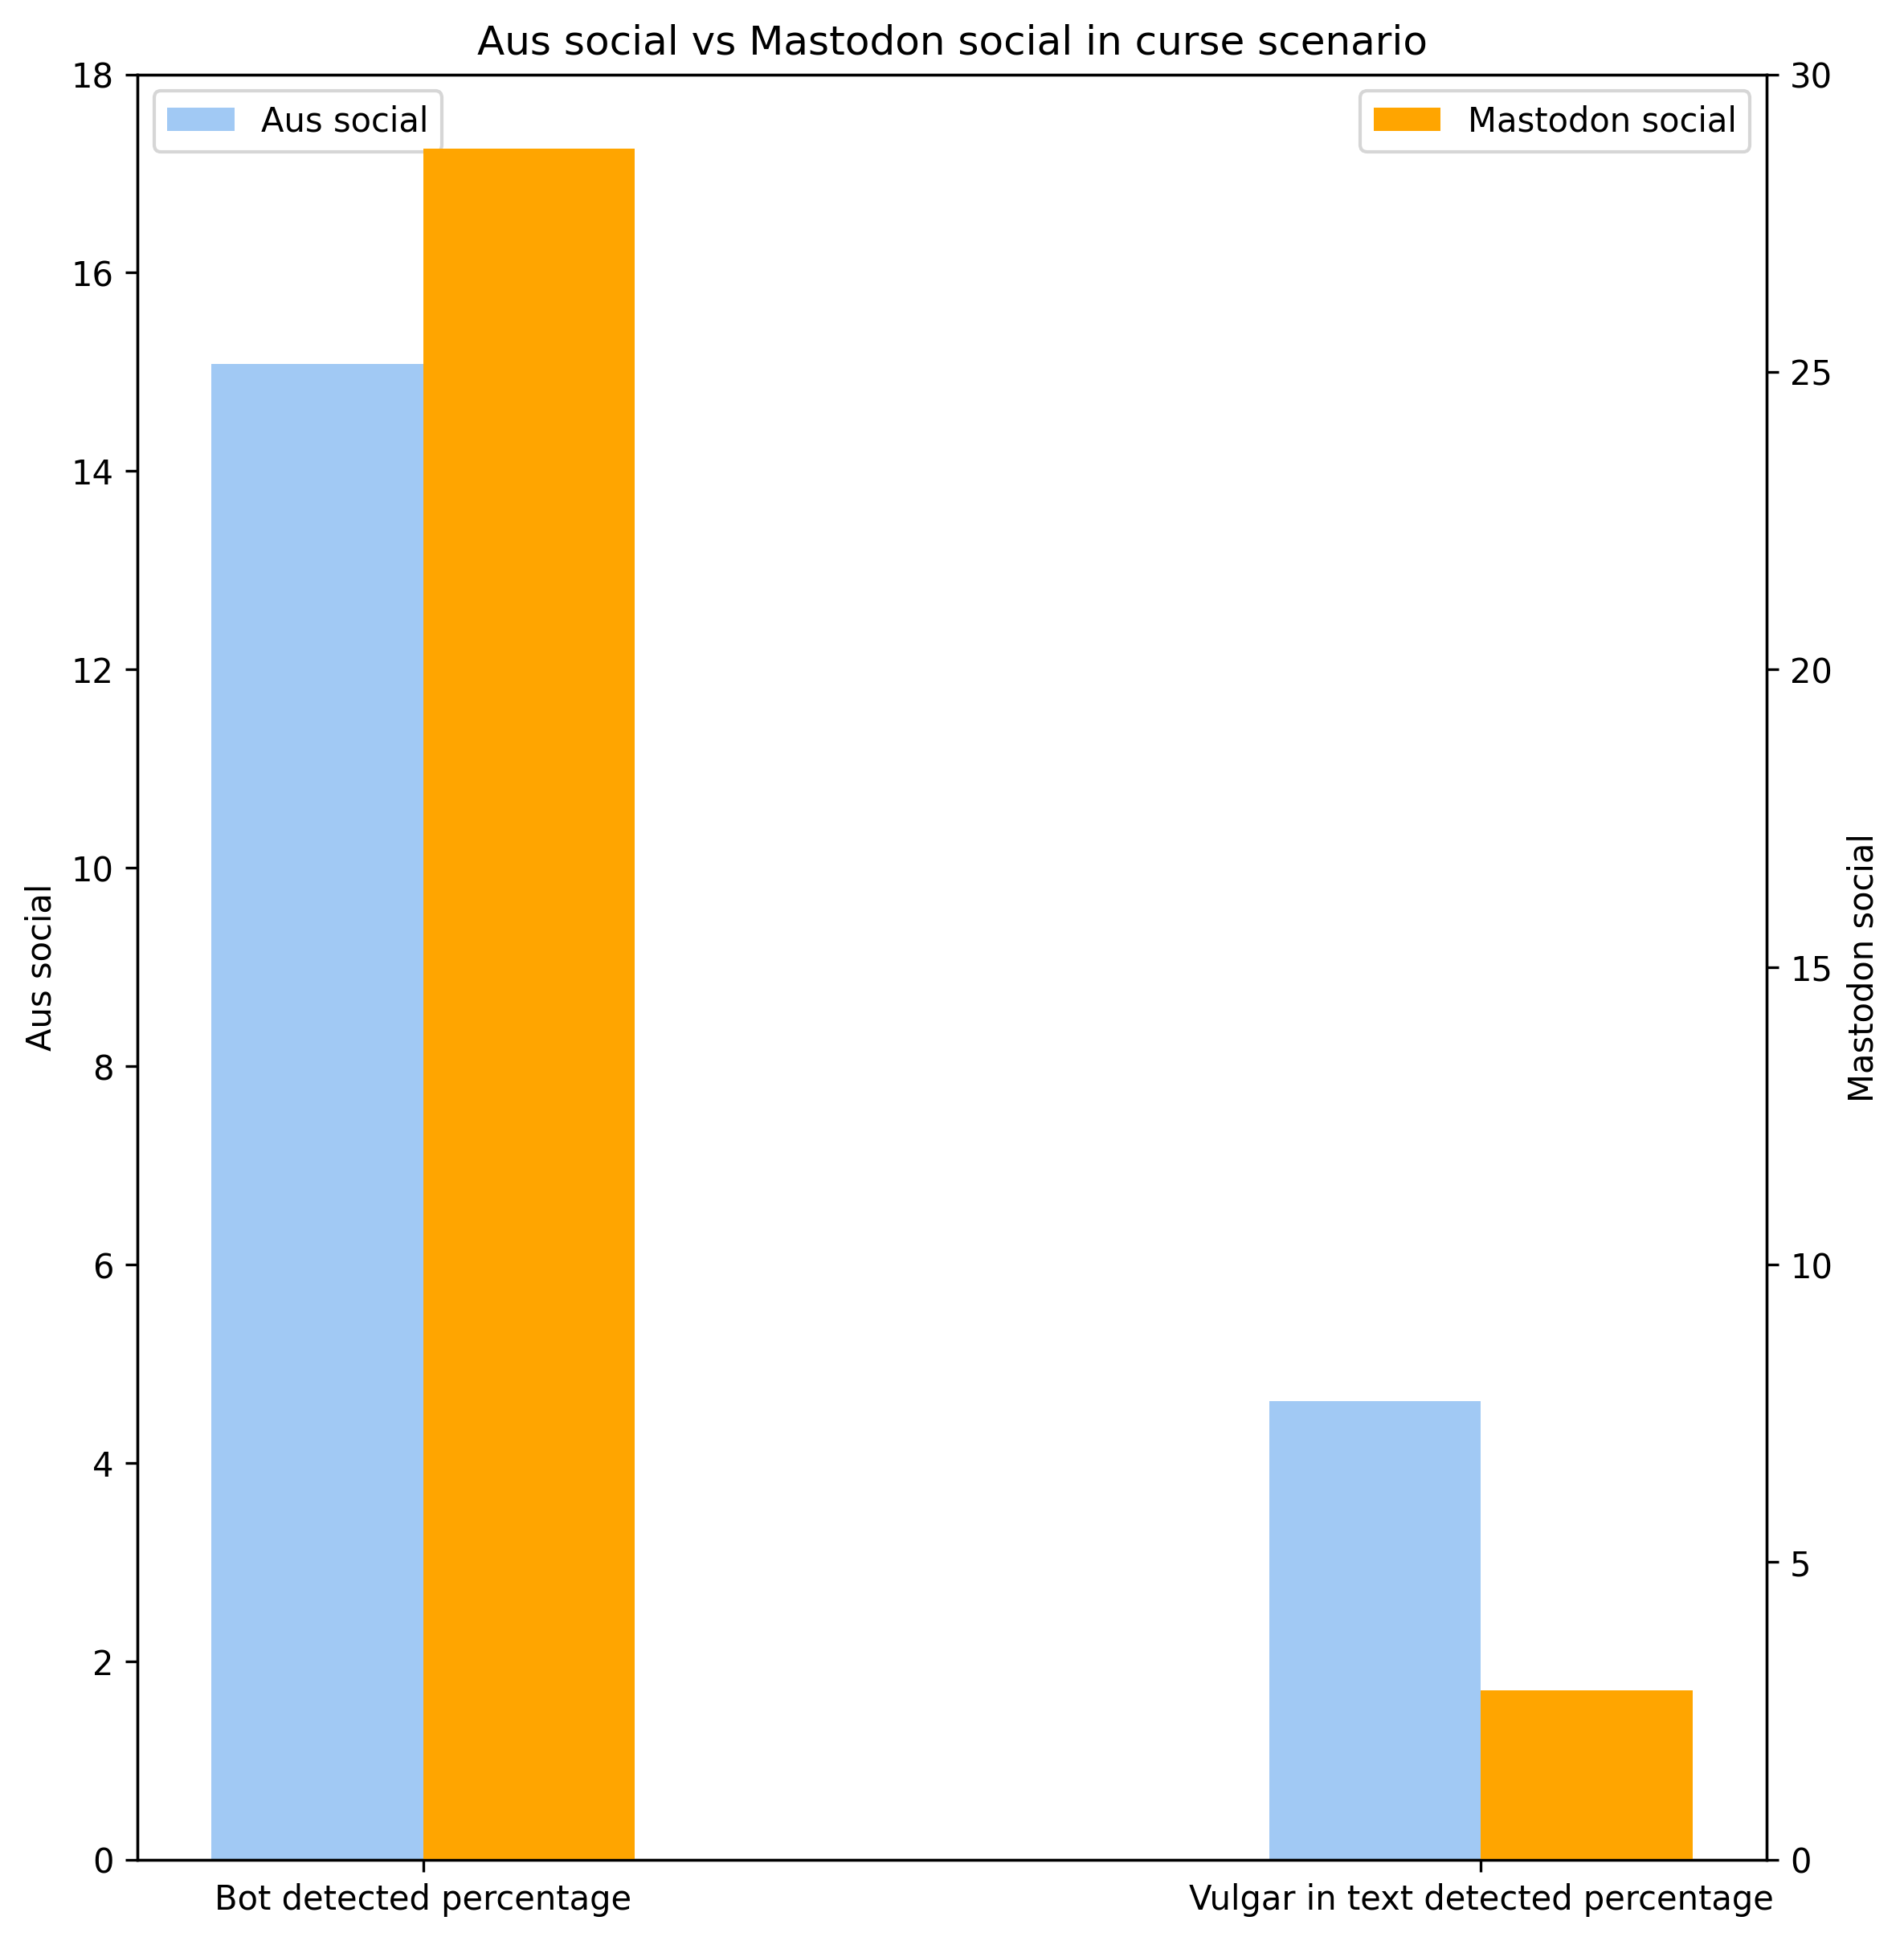

In [30]:
import seaborn as sns

# 定义颜色调色板
colors = sns.color_palette('pastel')

width = 0.2  # 柱形的宽度
x1_list = []
x2_list = []
for i in range(len(aus_mastodon_curse['scenario'])):
    x1_list.append(i)
    x2_list.append(i + width)
fig, ax1 = plt.subplots(figsize=(8, 8), dpi=300)
plt.xticks(rotation=0)

# 设置左侧Y轴对应的figure
ax1.set_ylabel('Aus social')
ax1.set_ylim(0, 18)
ax1.bar(x1_list,aus_mastodon_curse['aus social'],width=width, color=colors[0], align='edge')

# 设置右侧Y轴对应的figure
ax2 = ax1.twinx()
ax2.set_ylabel('Mastodon social')
ax2.set_ylim(0, 30)
ax2.bar(x2_list,aus_mastodon_curse['mastodon social'], width=width, color='orange', align='edge', tick_label=aus_mastodon_curse['scenario'])

ax2.legend(labels=['Mastodon social'], loc='upper right')
ax1.legend(labels=['Aus social'], loc='upper left')

plt.tight_layout()
plt.title('Aus social vs Mastodon social in curse scenario')

plt.show()

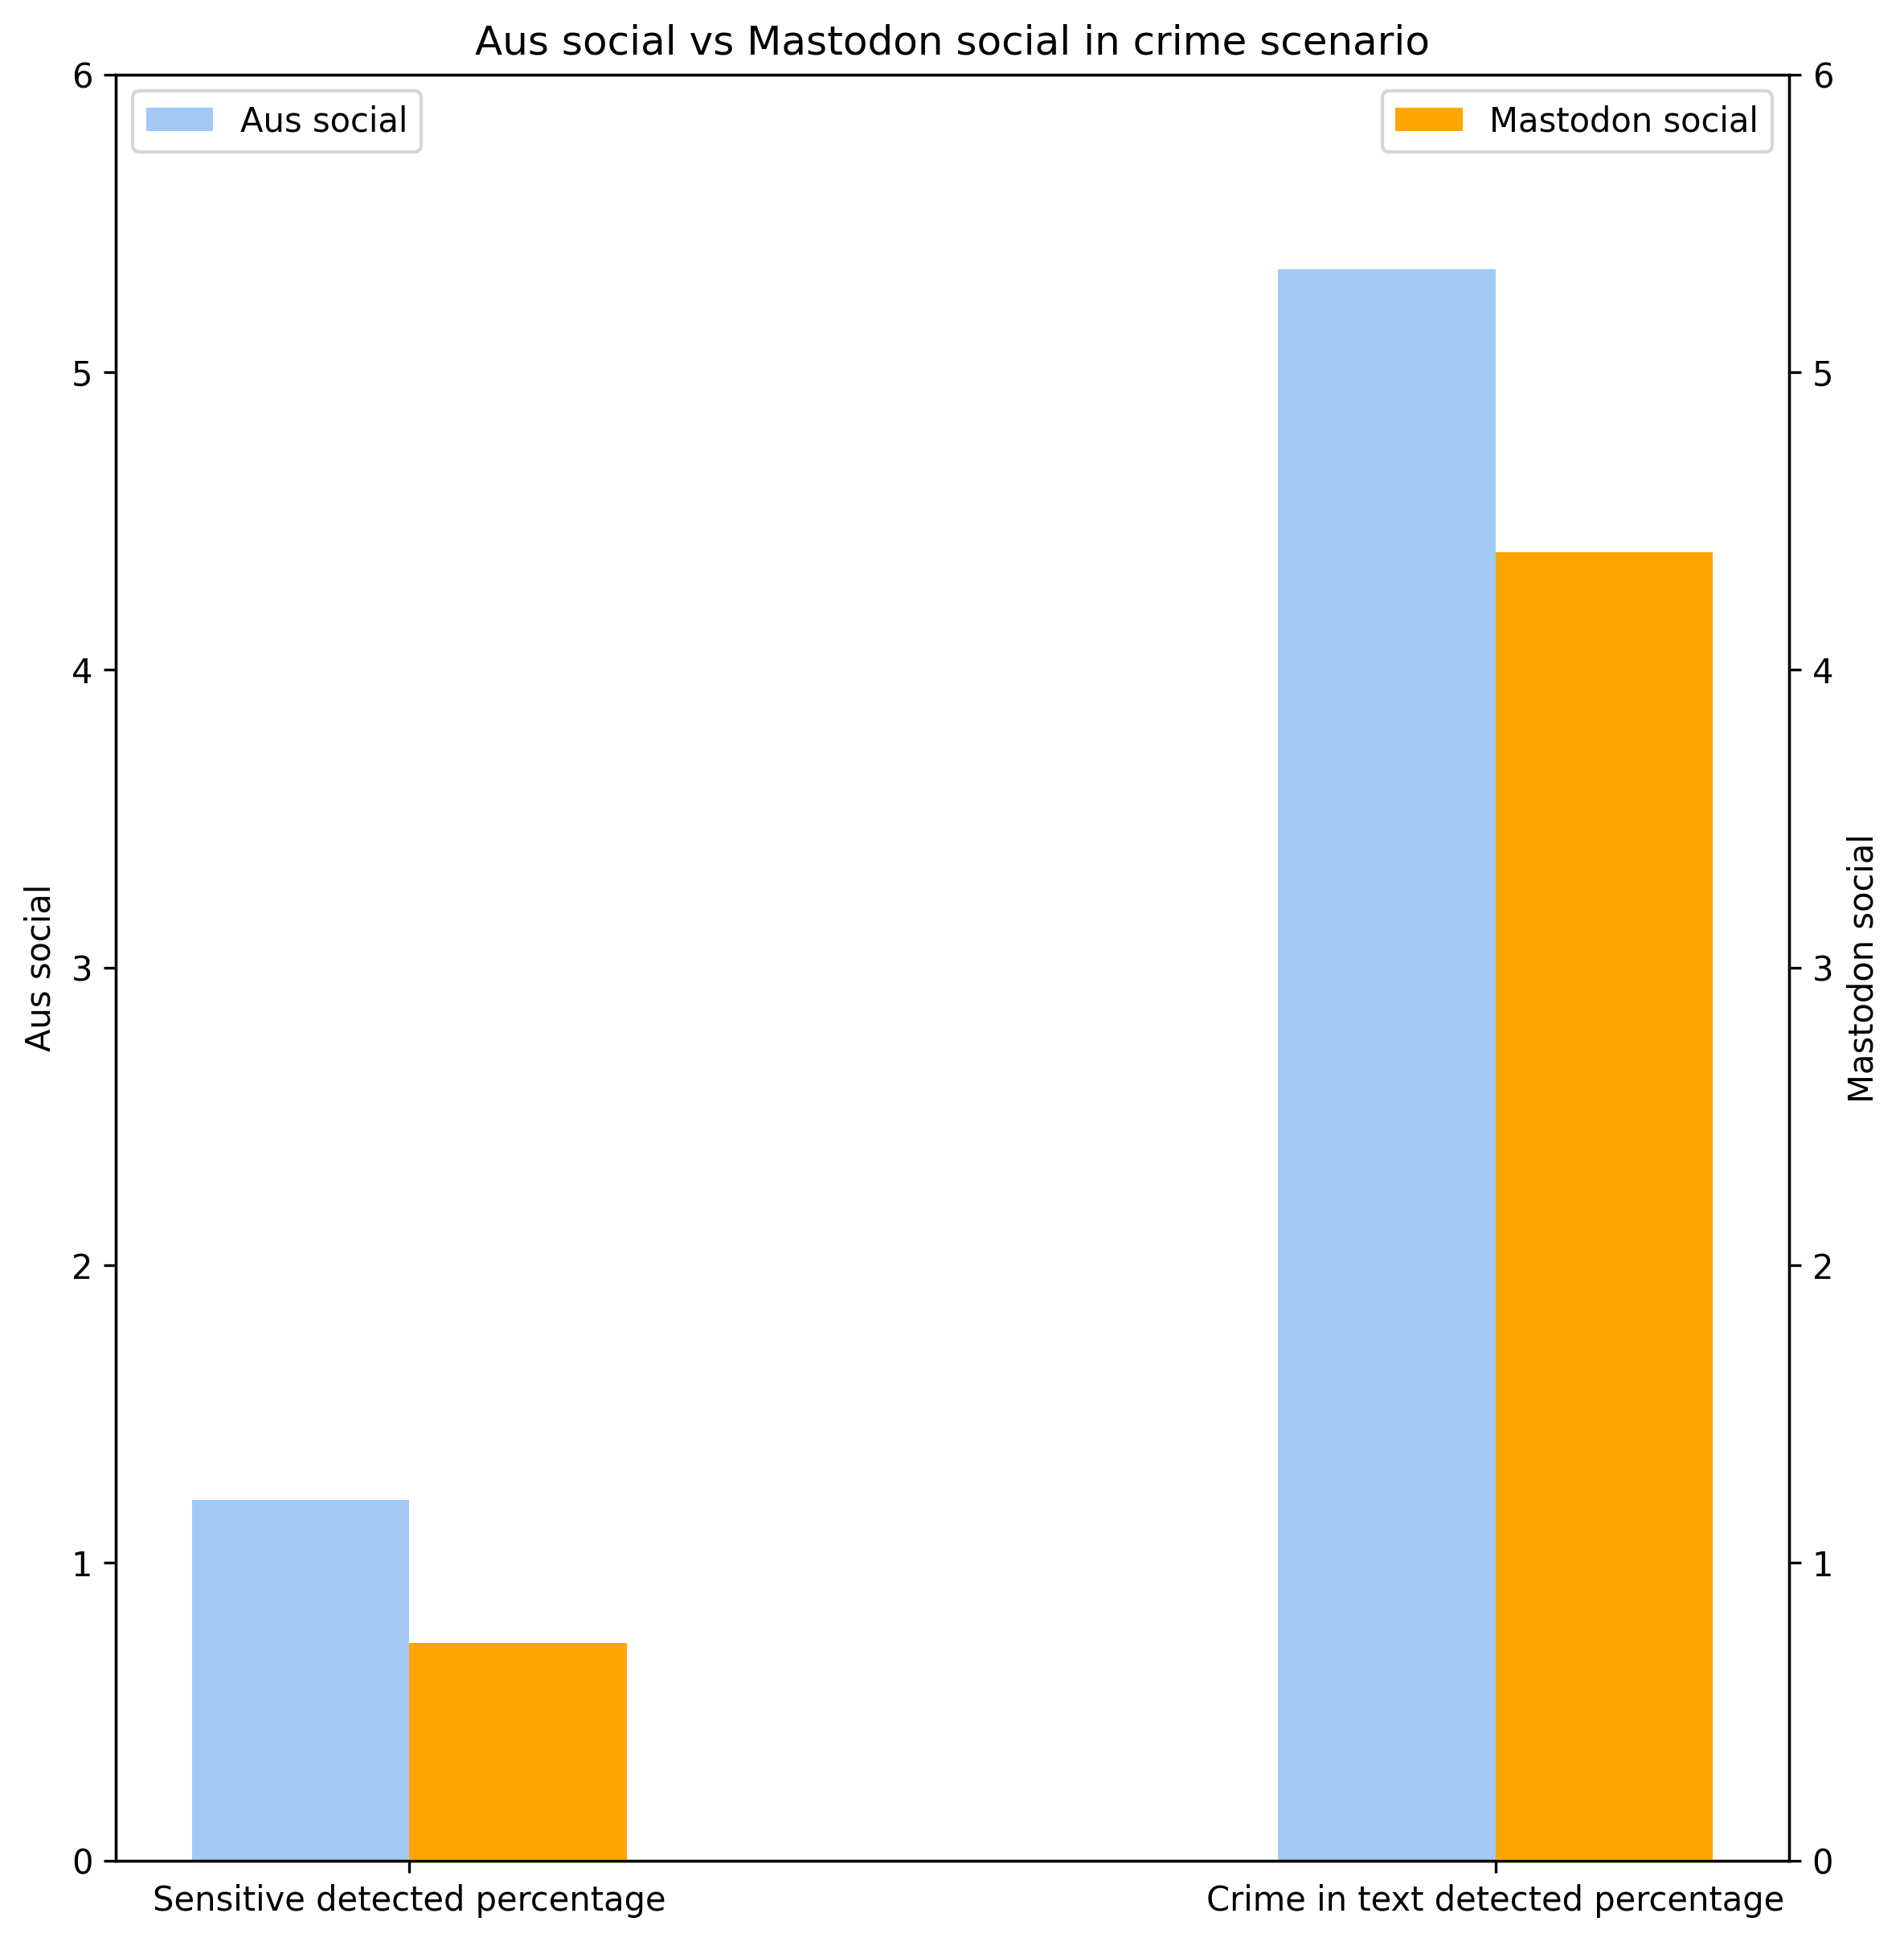

In [31]:
import seaborn as sns

# 定义颜色调色板
colors = sns.color_palette('pastel')

width = 0.2  # 柱形的宽度
x1_list = []
x2_list = []
for i in range(len(aus_mastodon_crime['scenario'])):
    x1_list.append(i)
    x2_list.append(i + width)
fig, ax1 = plt.subplots(figsize=(8, 8), dpi=300)
plt.xticks(rotation=0)

# 设置左侧Y轴对应的figure
ax1.set_ylabel('Aus social')
ax1.set_ylim(0, 6)
ax1.bar(x1_list,aus_mastodon_crime['aus social'],width=width, color=colors[0], align='edge')

# 设置右侧Y轴对应的figure
ax2 = ax1.twinx()
ax2.set_ylabel('Mastodon social')
ax2.set_ylim(0, 6)
ax2.bar(x2_list,aus_mastodon_crime['mastodon social'], width=width, color='orange', align='edge', tick_label=aus_mastodon_crime['scenario'])

ax2.legend(labels=['Mastodon social'], loc='upper right')
ax1.legend(labels=['Aus social'], loc='upper left')

plt.tight_layout()
plt.title('Aus social vs Mastodon social in crime scenario')

plt.show()